# Striving for Educational Attainment: Exploring the Relationship between Veterans and Their Educational Attainment
## Group Members
- Jason Lee
- Alexander Liu
- Briana Yang
- Franklin Zhang

## Introduction

### Motivation

&emsp;&emsp;On campus, students are constantly surrounded by a diverse tapestry of peers, each with unique backgrounds and future aspirations. Some students hold military backgrounds, having served before enrolling in college, while others consider enlisting after graduation, attracted by various motivations including career opportunities or a sense of duty. This diversity in experiences around us sparks our interest in understanding how education and military service both intersect and influence one another. It’s a topic that directly relates to the decisions we and our peers are making about our futures, especially in an environment where a paradox seemingly exists between the value of education and the merits of service. <br>
&emsp;&emsp;The motivation for our project, however, resides in understanding this dichotomy from the military’s perspective as well. Despite “focusing its marketing efforts on social media influencers and e-games,” the military has recently struggled reaching young individuals (KQED). In fact, “the Department of Defense says military services missed recruiting goals by 41,000 during the 2023 fiscal year” (Wavy). The Navy has subsequently no longer required those who enlist to have a high school diploma or GED, with officials believing that “anywhere from 500 to 2,000 more sailors will be able to enlist because of the change” (CBS8). 
<br>&emsp;&emsp;Though our data will only be from 2019, these statistics underscore the evolving landscape of military service and its relationship with education. Our exploration into this dynamic interplay will not only inform policy and support systems for veterans, but will also contribute to discussions on social mobility, career development, and the role of education in shaping the lives of those who serve.


### Importance

&emsp;&emsp;Although the number of people who are currently enlisting in the military are dropping, veterans are still a very important population in America that largely goes understudied. Given the literature currently out around higher education attainment and a person’s veteran status, there are still many gaps in the systematic return of veterans into civilian life and even more so while they are pursuing a higher education. Focusing on a veteran’s choice to continue pursuing higher education, we can see that many educational institutions are still lacking resources and persons of contact that veterans can use to help them succeed. <br>
&emsp;&emsp;There are many systematic inequities that can hinder American veterans from successfully returning to civilian life. From demographic differences, such as race and gender, to the struggles of dealing with a multitude of mental health issues, sometimes it can be too difficult to concentrate on pursuing an education when a veteran must first worry about insurance or unemployment. While there are educational benefits for veterans, such as the GI Bill and VA Education Benefits, only around “one-third of [post-9/11 veterans] were using the Post-9/11 GI Bill [and] approximately 16% were using other educational benefits” (Morgan et. al, 2023).  With such low usage of these educational benefits, the system should be updated to reach out to more veterans who may or may not know that these benefits are even in place.  
&emsp;&emsp;Once veterans make the decision to continue their education, there are not enough resources at every educational institution to help veterans succeed and finish their degrees. With the data from 2019, if we see that most people with higher education are less likely to be veterans, we can find solutions to reform the system currently in place to allow for more veterans to continue and finish their education as compared to nonveterans. 


## Literature Review

**Literature Review 1**<br>
Borsari, Brian et al. “Student service members/veterans on campus: Challenges for reintegration.” <i>The American journal of  <br>&emsp;&emsp; orthopsychiatry</i> vol. 87,2 (2017): 166-175. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5319708/.

&emsp;&emsp;In the realm of higher education, student service members and veterans (SSM/Vs) are navigating a landscape fraught with unique challenges, as highlighted by the literature. Despite the important uptake of the Post-9/11 GI Bill, with "over 800,000 SSM/Vs" enrolled, their journey is beleaguered by academic and social hurdles that their civilian peers seldom encounter. The literature is candid in disclosing that the path to degree completion for SSM/Vs is slower and more precarious, susceptible to the "exploitation by for-profit institutions," and marred by an increased prevalence of extreme-risk behaviors and mental health issues, that in turn, "contribute to academic difficulties and social isolation. (Bosari et. al, 2017)”
<br>&emsp;&emsp;The transition from a very structured military life to the less regimented academic environment presents SSM/Vs to a new kind of battle, one where the hierarchical learning and rigid training of military service are in stark contrast to the collegiate landscape. This separation not only impacts their academic adjustment, where "[v]eteran status is negatively associated with GPA," but also their ability to integrate socially, leaving many veterans to grapple with their identities and how they are seen on campus (Bosari et. al, 2017).
<br>&emsp;&emsp;The available interventions, although well-intentioned, lack rigorous evaluative foundation to measure their impact effectively. As the literature suggests, there is a clear deficit in "theoretically-based programs" that could holistically address the SSM/Vs’ complex needs (Bosari et. al, 2017). The current strategies, from specialized tutoring counseling services, show initial steps towards supporting SSM/Vs but require critical appraisal to ensure they are meeting the nuanced needs of this demographic. 
All in all, the literature serves as a call for a more analytical and responsive approach to SSM/V integration in higher education, underscoring the need for evidence-based practices. As SSM/V continue to bridge their military experiences with academic aspirations, the educational system's adaptability and supportiveness are paramount, a sentiment echoed by the researchers who recognize the potential of SSM/Vs to enrich the academic tapestry if given appropriate support. 

**Literature Review 2**<br>
Wang, Lin et al. “Status Configurations, Military Service and Higher Education.” <i>Social forces; <br>&emsp;&emsp;a scientific medium of social study and interpretation </i>vol. 91,2 (2012): 397-422. <br>&emsp;&emsp;https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3908479/.

&emsp;&emsp;Titled “Status Configurations, Military Service and Higher Education”, Lin Wang, Glen H. Elder Jr., and Naomi J. Spence's publication offers a fascinating examination of how military service functions as a form of social leverage, specifically for young men facing status inconsistency—where their socioeconomic background, cognitive abilities, and academic accomplishments do not align. Delving into the National Longitudinal Study of Adolescent Health data, the study sheds light on the military's potential to act as an equalizer in society. It highlights the fact that 12% of the survey's respondents have served in the military, suggesting that military service is a major influence on the trajectories of a notable subset of young Americans. This is particularly true for those with powerful cognitive potential but less impressive academic records, who see the military as a means to access educational opportunities and benefits that could pivot their life's trajectory toward success.
<br>&emsp;&emsp;The study depicts the military as an institution that stretches beyond its traditional defense role, serving instead as a strategic avenue for individuals to rectify the conflicting aspects of their social standing. By providing educational benefits, the military presents itself as a road to alleviate the "adaptive stress" associated with status inconsistency (Hornung, 1977), offering a sort of compensatory redemption for "underachievers." This proactive engagement with the military aligns with a more extensive narrative of striving to reconcile one's innate potential with the academic and social accolades they have yet to attain.
<br>&emsp;&emsp;However, the distribution of these educational benefits is not uniform across all social strata. The research uncovers that while the likelihood of attaining higher education through military service is heightened, the probability decreases for those hailing from the most disadvantaged backgrounds when it comes to securing a four-year degree. It delineates a complex interplay between individual status dimensions and the varying efficacies of military benefits, illuminating a tiered system where the military's role as an educational catalyst is conditional upon the socioeconomic landscape from which an individual emerges. 
<br>&emsp;&emsp;Collectively, the article presents military enlistment as a planned maneuver within the calculated game of social mobility. It underscores the military's two-fold capacity—as an esteemed national institution on one hand and as a sensible launchpad for personal and social progress on the other. This versatile role of the military as both a bastion of honor and a pragmatic vehicle for educational and socioeconomic progress is central to understanding the intricacies of how military service is spun into the fabric of American life, influencing the social architecture far beyond the bounds of established defense parameters.

**Literature Review 3**<br>
Li, Xiaoxue. “Improving the Labor Market Outcomes of US Veterans: The Long-Run Effect of <br>&emsp;&emsp;the Transition Assistance Program.” <i>Defence and Peace Economics</i>, vol. 31, no.1, 2020, <br>&emsp;&emsp;pp. 48-69, https://doi.org/10.1080/10242694.2018.1532229.

&emsp;&emsp;Xiaoxue Li’s 2018 article, “Improving the Labor Market Outcomes of US Veterans: The Long-Run Effect of the Transition Assistance Program”, examines a short, multi day career assistance program called the Transition Assistance Program (TAP). TAP is offered to veterans, and serves to reorient veterans to civilian hiring practices. The relevant aspect of Li’s article is not her main analysis, which examines the effectiveness of TAP in helping veterans transition to the civilian labor market. For our final project, the relevant analysis comes from Li’s explanation of how part of TAP’s effectiveness is derived from the GI Bills, as well as her commentary on veteran benefits and historical context.
<br>&emsp;&emsp;The main finding in the article is that TAP has done a good job getting veterans civilian jobs. Alongside that assertion, and more importantly for our final project, Li writes, “One potential mechanism is that TAP increased veterans’ use of VA educational benefits, namely the GI Bill. I find that TAP increased veterans obtaining some college education by 9.7 percentage points” (Li 65).
<br>&emsp;&emsp;Throughout the history of the United States, Congress has passed laws upholding a wide range of special benefits for veterans. Simply put, military service in itself is not attractive enough – for the Department of Defense to meet national security needs, it must sweeten the pot. Educational benefits for veterans, part of the pot-sweetening, are mainly derived from the GI Bills. Veterans that qualify can have all or part of their tuition paid for, a monthly allowance, and money for books and other supplies. Education for a degree and training programs both qualify for these forms of reimbursement.
The effectiveness of GI Bills are limited by an imperfect awareness of the existence of their benefits. Li noted that TAP increased the overall level of education for veterans. The main reason, Li postulated, was that TAP increased veterans’ awareness of the educational benefits available, and thus increased use of the GI Bills. On a similar note, TAP increased the number of veterans who sought to continue their education.
<br>&emsp;&emsp;Besides increasing the attractiveness of military service, there are a number of other pressures that push the U.S. government to establish education benefits for veterans. Not all skills in the military are transferable to the civilian world. Li writes, “15 percent of enlisted personnel work as members of combat units. Their training involves skills to ‘maneuver against enemy forces and positions and fire artillery, guns, mortars, or missiles to destroy those positions’” (Li 51). Additionally, instead of being a policy useful for recruitment, educational benefits can also be used during times of downsizing.
<br>&emsp;&emsp;Regardless of whether our project ultimately shows that veterans are more likely or less likely to obtain higher education, Li’s research points towards the fact that the U.S. government has, throughout history, has made education attainment more accessible for veterans.

**Literature Review 4**<br>
Barr, Andrew. “Fighting for Education: Financial Aid and Degree Attainment.” <i>Journal of Labor <br>&emsp;&emsp;Economics</i>, vol. 37, no. 2, 2019, pp. 509-544, https://doi.org/10.1086/700191.

&emsp;&emsp;Andrew Barr’s 2019 article “Fighting for Education: Financial Aid and Degree Attainment” studies the impact of financial aid on degree attainment as a whole. Barr exploits variation caused by the Post-9/11 GI Bill, which raised government spending on benefits from \\$3 billion to \\$13 billion.
<br>&emsp;&emsp;Barr gained access to the basic demographic information of 4 million service members through the Defense Manpower Data Center (DMDC). This information was paired with college data from the National Student Clearinghouse (NSC). 
<br>&emsp;&emsp;Barr concluded that the Post-9/11 GI Bill “increased degree attainment by 5–6 percentage points…” (Barr 509). Those 5–6 points mean degree attainment increased by more than 25%. In a statement quite relevant to our research question, Barr notes that the U.S. military is “the nation's largest employer of young adults” (510), and that it “markets itself as providing educational opportunities to youth who might not otherwise have the means to pay for college…” (510). Barr also notes that veterans are different from the general population of college students – for example, they are older. Additionally, veterans have a different reason for attending college, as they do it to transition between occupations.
<br>&emsp;&emsp;In a more general sense, zooming out from an examination of veterans, the author believes that financial aid will have even more of a positive impact on the general population. This is because, before the Post-9/11 Bill, veterans already received a comparatively hefty amount of financial aid, and are experiencing diminishing marginal returns.

**Literature Review 5**<br>
Morgan, N. R., Aronson, K. R., McCarthy, K. J., Balotti, B. A., & Perkins, D. F. (2023). <br>&emsp;&emsp;Post-9/11 Veterans’ Pursuit and Completion of Post-secondary Education: Social <br>&emsp;&emsp;Connection, Mental Health, and Finances. <i>Journal of Education</i>, 0(0). <br>&emsp;&emsp;https://doi.org/10.1177/00220574231168638.

&emsp;&emsp;This study researched the transition of 48,965 post-9/11 veterans from active duty to civilian life, and later higher education, and the barriers they may have faced. Morgan et. al first began by describing the hardships that many veterans experience when they transition back to civilian life. Higher rates of traumatic exposure and mental health are the ones most civilians think of first, but the physical disabilities, the potential for unemployment and living in worse conditions compared to nonveterans, and the difficulty balancing between different life directions also plague many veterans. Morgan et. al found that there were already inequities in place that inhibited certain demographic groups from completing a higher education degree, but that there were also positive predictors to educational attainment, most notably, the participation in veterans’ centers and veteran student organizations. 
<br>&emsp;&emsp;The surveyed veterans were split into 7 Waves of groups and then further separated by demographics: age, sex, race/ethnicity, paygrade, and military occupation. They were then analyzed by the degrees they were pursuing, whether they were full or part time students, exposure to veteran-focused services, and whether or not they left higher education. The majority of their analysis came from veterans from enlisted ranks because they saw that officers often have college degrees before entering the military. However, most veterans from enlisted ranks usually only had a high school education and no exposure to higher education (Morgan et. al, 2023) and so they focused on enlisted ranks a little bit more closely. 
<br>&emsp;&emsp;The results from the study included statistics on the demographics of veterans that completed and did not complete their higher education, the reasons veterans left higher education, and the exposure of veteran groups while in school. Morgan et. al saw that 9% of veterans left school to pursue other activities and that 5% decided to leave because of academic problems or problematic financial status. They also highlighted that veterans who showed probable depressive symptoms were 3.03 times more likely to leave school due to academic concerns compared to veterans who did not meet those criteria (Morgan et. al, 2023). A positive result that the authors highlighted was that post-9/11 veterans who utilized a veterans’ center were 94% more likely to attain a degree and those who used a veteran-student organization were 97% more likely to attain a degree (Morgan et. al, 2023). 
<br>&emsp;&emsp;The authors continue on by discussing that one way to help post-9/11 veterans on their educational journey is by providing specialized outreach and clinical services to and especially for female veterans, veterans of color, and veterans from the enlisted ranks (Morgan et. al, 2023). This study hypothesized that, because veteran students are demographically, culturally, and experientially different than other students, their need for integration into institutions of higher education is critical and because this field is so understudied they hope that future studies also focus on how higher education-based veteran support groups help not only educational attainment, but also mental health, social functioning, and future employability (Morgan et. al 2023). 

**Literature Review 6** <br>
Semer, Claire and Harmening, Debra S. “Exploring Significant Factors that Impact the Academic <br>&emsp;&emsp;Success of Student Veterans in Higher Education.” <i>Journal of Higher Education Theory <br>&emsp;&emsp;and Practice</i>, vol.15(7), 2015, pp. 31-43. <br>&emsp;&emsp;http://www.na-businesspress.com/JHETP/SemerC_Web15_7_.pdf. 

&emsp;&emsp;Semer and Harmening’s study focused on identifying which factors could best help student veterans succeed academically. They began first by describing how many universities, as well as society, are unaware of the difficulties of student veterans transitioning into their first year at university. Because veterans are usually older than traditional college freshman, and many times they are married and have different life experiences up until that point, these authors hope to establish that veterans are a very unique and understudied group of students (Semer and Harmening, 2015). By surveying 4,000 first-year veterans attending colleges and universities in the state of Ohio, the researchers addressed six different questions: what demographic characteristics, institutional characteristics, academic involvements, faculty-to-student interactions, student-to-student interactions, and co-curricular involvements could impact a student veteran’s academic success? 
<br>&emsp;&emsp;The first question is mostly resolved describing the systematic inequities in place that could inhibit certain student veterans from performing well or even finishing their degree. They continue to describe the second research question and that the differences between institutions, mainly between public and private institutions, could also benefit or inhibit certain students. But mostly, they describe that some institutions label themselves as “veteran friendly” or “military friendly” but fail to retain many student veterans as a result of inadequate support (Semer and Harmening, 2015). An interesting statistic comes from the research question regarding faculty-student interactions. When student veterans received oral feedback from faculty members about their academic performance, there was a significant positive predictor on their academic success (Semer and Harmening, 2015). However, when student veterans talked to faculty members about their career aspirations, there was a statistically significant negative indicator of the student veterans’ academic success. The researchers believe that this can be attributed to a new period of exploration and indecisiveness a student veteran could be experiencing negatively impact their grades because of their reality of not living up to their own aspirations. Other results included how exercising was a positive predictor of veterans’ academic success, time spent commuting to class was a significant negative indicator of a veterans’ academic success, and how a higher number of enrolled credit hours are a negative indicator for a student veterans’ GPA (Semer and Harmening, 2015). 
<br>&emsp;&emsp;The researchers conclude with two recommendations regarding student veteran transition and involvement; the first is to “make data-driven decisions when determining the best options for assisting student veterans” and make sure that colleges and universities understand its their responsibility to help student veterans adjust their lifestyle. The second is to create a transition programming for student veterans regarding their career path, more specifically a veteran-specific orientation to campus resources and activities that could help ease the transition into civilian and university life. “The results of this study suggested that student veterans do not desire special treatment but rather a sense that faculty members appreciate their circumstances, including family obligations, work obligations, and academic challenges” (Semer and Harmening, 2015). 

**Literature Review 7**<br>
Huyser, K.R., and Locklear, S. "Examining the Association Between Veteran Status and <br>&emsp;&emsp;Socioeconomic Status Among American Indian and Alaska Native Men in the 
<br>&emsp;&emsp;USA." <i>Journal of Economics and Race Policy</i>, vol. 5, 2022, pp. 167–180. 
<br>&emsp;&emsp;https://ideas.repec.org/a/spr/joerap/v5y2022i3d10.1007_s41996-022-00101-z.html.

&emsp;&emsp;“Examining the Association Between Veteran Status and Socioeconomic Status Among American Indian and Alaska Native Men in the USA” by Huyser and Locklear examines a specific demographic to determine whether military service and subsequent access to benefits associated with military training and veterans benefits offers a method of social mobility for American Indian and Alaska Native Men (AIAN). Utilizing IPUMS data consisting of a sample of “American Indian, Alaska Native, and non-Hispanic white men between the ages of 22 and 83” and examining in particular single-race AIAN active-duty veterans serving between 1975 and 2001 and non-veterans, the authors do find that veteran status is associated with greater rates of higher education (at least a bachelor's degree) compared to non-veteran counterparts within the sample. They also find that veterans tended to have higher incomes, but such gains in income were insufficient in closing the income gap between AIAN and white men.
<br>&emsp;&emsp;The authors formed these conclusions based on a “logistic regression of whether an individual holds a bachelor’s degree and OLS regression on logged total income.” The authors cite an interesting idea where military service may be seen as a social mobility opportunity (a way to increase wealth and socioeconomic status). It would be very interesting to see how much of a role this factor, including GI education benefits, plays in individuals from marginalized groups deciding to serve as veterans compared to other wealthier demographics. While my hypothesis is that AIAN men would place a heavier emphasis on education, it would also be interesting to see veteran attitudes towards education by race and other demographics.

**Literature Review 8**<br>
Lennon, Conor. “G.I. Jane Goes to College? Female Educational Attainment, Earnings, and the <br>&emsp;&emsp;Servicemen’s Readjustment Act of 1944.” <i>The Journal of Economic History </i> 81.4 (2021): <br>&emsp;&emsp;1223–1253. https://doi.org/10.1017/S0022050721000425.

&emsp;&emsp;In an examination of the legacy of the 1944 Servicemen’s Readjustment Act (more famously known as the “G.I. Bill”), Lennon provides a glimpse into its effect on the 330,000 female WWII veterans. The bill, passed to facilitate the reintegration of veterans into society, provided a large range of benefits, including tuition payments for higher education, unemployment assistance, and other financial benefits. Controlling for the period of time served in the war (to separate the effect of military service itself from the G.I. Bill effects), the author finds that “female WWII veteran status is associated with a 19 percentage point increase in the proportion who report any college attendance, a 7.8 percentage point increase in college completion, and earnings that are 19.8 percent greater relative to comparable females who are not veterans.” The author also found that the educational benefits from the G.I. Bill alone offered 73% explainability “of the overall difference between veteran and non-veteran females’ earnings in 1980” with an 11.6% increase in earnings “per year of  G.I. Bill-induced education.” The G.I. Bill from 1944 has faced historical criticism for discrimination and widening the income gap between blacks and whites. Although black veterans were officially entitled to the same benefits, they faced discrimination in trying to claim such benefits. It would be interesting to see how benefits from the GI Bill compares not only across genders but also race demographics (e.g. White, African American, Japanese, etc.). Although the original GI Bill is not in effect, it would be interesting to compare the original bill to its current counterpart: The Post-9/11 GI Bill (otherwise known as the Post-9/11 Veterans Educational Assistance Act of 2008).

## Data

&emsp;&emsp;Our data is sourced from IPUMS, which stands for “Integrated Public Use Microdata Series”. While this project by the University of Minnesota has expanded beyond that acronym, for our use, it is accurate. IPUMS provides collections of microdata for free (IPUMS). Microdata is data that displays responses from each specific individual or household. More specifically, we used IPUMS USA, a division of IPUMS that provides data from the U.S. Census and the American Community Survey (IPUMS USA).<br>&emsp;&emsp;VETSTAT is our first variable of interest – it is being used to indicate whether an individual is a veteran or not. It is a categorical variable, with 0 indicating “N/A”, 1 indicating “Not a veteran”, 2 indicating “Veteran”, and 9 indicating “Unknown”. We used this data to create a dummy variable, where 0 corresponds to non-veteran status and 1 corresponds to veteran status. Codes 0 and 9 were dropped.
<br>&emsp;&emsp;Simply put, an individual has veteran status if they, in the past, served in active duty in any branch of the U.S. military – namely, the Army, Navy, Air Force, Marine Corps, or Coast Guard. Their service may be for any length of time and may be served anywhere. They cannot presently be on active duty. Civilian employment in bureaucracies related to war, like the Department of Defense, does not count towards veteran status. Additionally, service in the Merchant Marines is only counted if the service was during World War II. Lastly, service in another country’s military is not counted. Non-veteran status typically either indicates that the individual never served, or that they are currently on active duty.
<br>&emsp;&emsp;The data is sourced from the American Community Survey, a nationwide survey conducted by the U.S. Census Bureau.
<br>&emsp;&emsp;EDUC is the second variable of interest – it shows the individual’s highest year of education. It is also a categorical variable. Data for this variable is also sourced from the American Community Survey. Nursery school to 4th grade are grouped together, and so is 5th grade to 8th grade. Beyond that, grades are indicated individually until the 5th year of college – subsequent years of higher education are grouped under “5+ years of college”. Interestingly, the code “00” denotes both no schooling and “N/A”.
<br>&emsp;&emsp;From this data, two dummy variables were created to organize the individuals into those who graduated high school and those who graduated college. In the variable “HS”, anyone who attained education in Grade 12 or higher would be marked with a 1, and those without a 0. Similarly, in the variable “College”, a 1 is awarded to those with four years of college or more. Those without receive a 0.<br>&emsp;&emsp;Three demographic variables were also examined: age, race, and gender. From IPUMS, race is coded as such: 1 for White, 2 for Black/African American, 3 for American Indian or Alaska Native, 4 for Chinese, 5 for Japanese, 6 for “Other Asian or Pacific Islander”, 7 for “Other race”, 8 for two major races, and 9 for 3+ major races. Ultimately, the race codes were organized into three dummy variables: 1 for white and 0 for not white, 1 for black and 0 for not black, and 1 for other and 0 for white or black. Individuals who indicated that they were multiple races or a race not listed are grouped as “Other” in our data.<br>&emsp;&emsp;In the IPUMS variable “Sex”, 1 indicates male and 2 indicates female. This was translated to 0 for male and 1 for female in the dummy variable “Gender”.<br>&emsp;&emsp;As for age, each code corresponds to its age, up to 96 years. As in, a code of 050 would correspond to 50 years. 000 corresponds to an age less than one year old. 999, “Missing”, was dropped. Age data was also cleaned to eliminate anyone younger than 25 years, which is around the age where a strong majority of people have completed their education and entered the workforce. In 2022, Americans 16 to 24 years of age had an employment rate of 41.5%, while those 25 to 29 years of age had a rate of 79.1%.

## Works Cited
Barr, Andrew. “Fighting for Education: Financial Aid and Degree Attainment.” Journal of Labor <br>&emsp;&emsp;Economics, vol. 37, no. 2, 2019, pp. 509-544<br>

Braye, KaMaria. “U.S. Military Sees Record Breaking Low Recruitment Numbers.” WAVY.Com, <br>&emsp;&emsp;WAVY.com, 27 Dec. 2023, <br>&emsp;&emsp;www.wavy.com/news/military/u-s-military-sees-record-breaking-low-recruitment-numbers/.<br> 

Huyser, K.R., and Locklear, S. "Examining the Association Between Veteran Status and <br>&emsp;&emsp;Socioeconomic Status Among American Indian and Alaska Native Men in the 
<br>&emsp;&emsp;USA." *Journal of Economics and Race Policy*, vol. 5, 2022, pp. 167–180. 
<br>&emsp;&emsp;doi:10.1007/s41996-022-00101-z.<br>

Lennon, Conor. “G.I. Jane Goes to College? Female Educational Attainment, Earnings, and the <br>&emsp;&emsp;Servicemen’s Readjustment Act of 1944.” The Journal of Economic History 81.4 (2021): <br>&emsp;&emsp;1223–1253. Web.

Li, Xiaoxue. “Improving the Labor Market Outcomes of US Veterans: The Long-Run Effect of <br>&emsp;&emsp;the Transition Assistance Program.” Defence and Peace Economics, vol. 31, no.1, 2020, <br>&emsp;&emsp;pp. 48-69, https://doi.org/10.1080/10242694.2018.1532229. Accessed 25 March 202b4. <br>

Morgan, N. R., Aronson, K. R., McCarthy, K. J., Balotti, B. A., & Perkins, D. F. (2023). <br>&emsp;&emsp;Post-9/11 Veterans’ Pursuit and Completion of Post-secondary Education: Social <br>&emsp;&emsp;Connection, Mental Health, and Finances. Journal of Education, 0(0). <br>&emsp;&emsp;https://doi.org/10.1177/00220574231168638 <br>

Semer, Claire and Harmening, Debra S. “Exploring Significant Factors that Impact the Academic <br>&emsp;&emsp;Success of Student Veterans in Higher Education.” Journal of Higher Education Theory <br>&emsp;&emsp;and Practice, vol.15(7), 2015, pp. 31-43. http://www.www.na-businesspress.com/JHETP/SemerC_Web15_7_.pdf <br>

US Navy No Longer Requires High School Diploma to Enlist | Cbs8.Com, <br>&emsp;&emsp;www.cbs8.com/article/news/national/military-news/navy-no-longer-requiring-high-school-<br>&emsp;&emsp;diploma/509-ec99e7e4-c9c8-4312-820f-72e2d09580d4. <br>

Wunderlich, Annelise. “Should the U.S. Military Recruit on High School Campuses?” KQED, 30 <br>&emsp;&emsp;Mar. 2023, www.kqed.org/education/536448/should-the-u-s-military-recruit-on-high-school-campuses.<br>


In [1]:
%pip install seaborn --upgrade
%pip show seaborn


Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\alexa\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
import os
import numpy as np

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
data_path = "Data"

df = pd.read_csv(os.path.join(data_path,"usa_00002.csv.gz"))

In [5]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'SEX', 'AGE', 'RACE', 'RACED', 'EDUC', 'EDUCD',
       'VETSTAT', 'VETSTATD'],
      dtype='object')

In [6]:
df.index


RangeIndex(start=0, stop=3239553, step=1)

In [7]:
data = df[['AGE','EDUC','VETSTAT','RACE','SEX']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239553 entries, 0 to 3239552
Data columns (total 5 columns):
 #   Column   Dtype
---  ------   -----
 0   AGE      int64
 1   EDUC     int64
 2   VETSTAT  int64
 3   RACE     int64
 4   SEX      int64
dtypes: int64(5)
memory usage: 123.6 MB


## Data Cleaning and Preprocessing

### Age

In [9]:
data['AGE'].max() # Check if we have 999 missing code

96

In [10]:
# Drop all with education below 25
data = data[data['AGE'] >= 25]

### Race (Before)
- 1: White
- 2: Black/African American
- 3: American Indian or Alaska Native
- 4: Chinese
- 5: Japanese
- 6: Other Asian or Pacific Islander
- 7: Other race, nec
- 8: Two major races
- 9: Three or more major races
### Race Conversion to Dummy Variables "White", "Black", and "Other"
- White/not white: 1 if white, else 0
- Black/not black: 1 if black/African American, else 0
- Other/not other: 1 if not white or black, else 0

In [11]:
data['WHITE'] = data['RACE'].map(lambda x: 1 if x == 1 else 0)
data['BLACK'] = data['RACE'].map(lambda x: 1 if x == 2 else 0)
data['OTHER'] = data['RACE'].map(lambda x: 1 if x > 2 else 0)

### Gender (Raw IPUMs Codes)
- 1: Male
- 2: Female
### Gender (Updated)
- 0: Male
- 1: Female

In [12]:
data['GENDER'] = data['SEX'].map(lambda x: 1 if x == 2 else 0)

### VETSTAT (Raw IPUMs Codes)
- 0: N/A
- 1: Not a veteran
- 2: Is a veteran
- 9: Unknown

### VETSTAT (Updated)
- 0: Not a veteran
- 1: Is a veteran

In [13]:
# Remove VETSTAT codes 0 (N/A) and 9 (unknown)
data = data[~data['VETSTAT'].isin(set([0,9]))] # Remove people not qualified to serve as a veteran by AGE or other reasons

In [14]:
# Code VETSTAT to dummy variables
vetstat_conversion = {1:0, 2:1}
if 2 in data['VETSTAT'].values: # prevent double run
    data['VETSTAT'] = data['VETSTAT'].apply(lambda x: vetstat_conversion[x])

### EDUC (Raw IPUMs Codes)
- 00: N/A or no schooling
- 01: Nursery school to grade 4
- 02: Grade 5, 6, 7, or 8
- 03: Grade 9
- 04: Grade 10
- 05: Grade 11
- 06: Grade 12
- 07: 1 year of college
- 08: 2 years of college
- 09: 3 years of college
- 10: 4 years of college
- 11: 5+ years of college
- 99: Missing

### EDUC Conversation to Dummy Variables "HS" and "College"
- High school diploma/no high school diploma (HS): 1 if Grade 12 or more, else 0
- Graduated college/did not graduate: 1 if 4 years of college or more, else 0

In [15]:
data = data[data['EDUC'] != 99]

In [16]:
data['HS'] = data['EDUC'].map(lambda x: 0 if x < 6 else 1)
data['COLLEGE'] = data['EDUC'].map(lambda x: 0 if x < 10 else 1)

## Descriptive Statistics
- Lists age, gender, and race (White, Black, Other)
- Lists level of education (HS, College)
- Lists veteran status

- AGE, GENDER, WHITE, BLACK, OTHER, HS, COLLEGE, VETSTAT


In [17]:
summary_table = pd.DataFrame()
remove = set(["EDUC","RACE","SEX"])
for column in data.columns:
    if column in remove:
        continue
    summary_table[column] = data[column].agg(['count','mean','std','min','max'])

summary_table.T
# We separated RACE into three dummy variables, recoded GENDER, divided EDUC into three dummy variables

,count,mean,std,min,max
AGE,"2,327,346.00",53.89,16.91,25.00,96.00
VETSTAT,"2,327,346.00",0.09,0.28,0.00,1.00
WHITE,"2,327,346.00",0.79,0.41,0.00,1.00
BLACK,"2,327,346.00",0.09,0.29,0.00,1.00
OTHER,"2,327,346.00",0.12,0.32,0.00,1.00
GENDER,"2,327,346.00",0.52,0.50,0.00,1.00
HS,"2,327,346.00",0.91,0.28,0.00,1.00
COLLEGE,"2,327,346.00",0.34,0.47,0.00,1.00


## Plots

In [204]:
# https://python-graph-gallery.com/stacked-and-percent-stacked-barplot/
total = data[['VETSTAT','COLLEGE']].groupby(['COLLEGE','VETSTAT']).value_counts()
total

COLLEGE  VETSTAT
0        0          1389421
         1           142552
1        0           735704
         1            59669
Name: count, dtype: int64

In [205]:
#total has a MultiIndex index we need to reset it
total = total.reset_index(level=[0,1]) # ["EDUC", "VETSTAT"] also works here
total

,COLLEGE,VETSTAT,count
0,0,0,1389421
1,0,1,142552
2,1,0,735704
3,1,1,59669


In [206]:
def race_label(row):
    if row['WHITE']:
        return 'WHITE'
    if row['BLACK']:
        return 'BLACK'
    
    return 'OTHER'

In [207]:
data['RACE_LABEL'] = data[['WHITE','BLACK','OTHER']].apply(race_label,axis=1)

In [208]:
race_vet = data[['RACE_LABEL','COLLEGE','VETSTAT']].groupby(['VETSTAT','COLLEGE']).value_counts().reset_index()
race_vet

,VETSTAT,COLLEGE,RACE_LABEL,count
0,0,0,WHITE,1078324
1,0,0,OTHER,160821
2,0,0,BLACK,150276
3,0,1,WHITE,594739
4,0,1,OTHER,98698
5,0,1,BLACK,42267
6,1,0,WHITE,120563
7,1,0,BLACK,14398
8,1,0,OTHER,7591
9,1,1,WHITE,52042


In [209]:
test = race_vet.groupby(["VETSTAT","RACE_LABEL","COLLEGE"]).sum()
test

count
VETSTAT RACE_LABEL COLLEGE         
0       BLACK      0         150276
                   1          42267
        OTHER      0         160821
                   1          98698
        WHITE      0        1078324
                   1         594739
1       BLACK      0          14398
                   1           4389
        OTHER      0           7591
                   1           3238
        WHITE      0         120563
                   1          52042

In [210]:
totals = {}
# vt, rl
for vt in (0,1):
    for rl in ("BLACK","WHITE","OTHER"):
        totals[(vt,rl)] = test.loc[vt].loc[rl].sum()

totals

{(0,
  'BLACK'): count    192543
 dtype: int64,
 (0,
  'WHITE'): count    1673063
 dtype: int64,
 (0,
  'OTHER'): count    259519
 dtype: int64,
 (1,
  'BLACK'): count    18787
 dtype: int64,
 (1,
  'WHITE'): count    172605
 dtype: int64,
 (1,
  'OTHER'): count    10829
 dtype: int64}

In [211]:
def race_to_pct(x,rl,vt):
    print((vt,rl), (vt,rl) in total)
    cnt = totals[(int(vt),str(rl))] # # of people of both vetstat status and race_label with 4+ years of college
    return ((x['count']/cnt)) * 100

total

,COLLEGE,VETSTAT,count
0,0,0,1389421
1,0,1,142552
2,1,0,735704
3,1,1,59669


In [212]:
race_vet['norm_cnt'] = race_vet.apply(lambda x: race_to_pct(x,rl=x['RACE_LABEL'],vt=x["VETSTAT"]),axis=1)
race_vet = race_vet[race_vet['COLLEGE'] == 1]

(0, 'WHITE') False
(0, 'OTHER') False
(0, 'BLACK') False
(0, 'WHITE') False
(0, 'OTHER') False
(0, 'BLACK') False
(1, 'WHITE') False
(1, 'BLACK') False
(1, 'OTHER') False
(1, 'WHITE') False
(1, 'BLACK') False
(1, 'OTHER') False


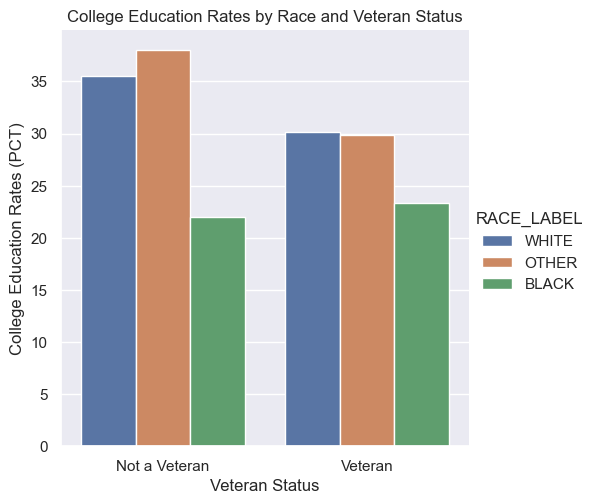

In [213]:
sns.catplot(data=race_vet, kind='bar',x='VETSTAT',y ='norm_cnt',hue='RACE_LABEL',errorbar=None)

plt.title("College Education Rates by Race and Veteran Status")
plt.ylabel("College Education Rates (PCT)")
plt.xlabel("Veteran Status")
plt.xticks([0,1],["Not a Veteran", "Veteran"])
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
# multi-index by two variables. (White and Vet in College) / (White & Vet)

In [214]:
def convert_educ(x):
    if x['COLLEGE']:
        return "COLLEGE"
    if x['HS']:
        return 'HS'
    
    return "NONE"

In [215]:
data['EDUC_LABEL'] = data.apply(convert_educ,axis=1)

In [30]:
educ_vet = data[['COLLEGE','VETSTAT','EDUC_LABEL','HS']].groupby('VETSTAT').value_counts().reset_index()

In [31]:
educ_vet

,VETSTAT,COLLEGE,EDUC_LABEL,HS,count
0,0,0,HS,1,1199232
1,0,1,COLLEGE,1,735704
2,0,0,NONE,0,190189
3,1,0,HS,1,133647
4,1,1,COLLEGE,1,59669
5,1,0,NONE,0,8905


In [32]:
educ_cnts = data['EDUC_LABEL'].value_counts().to_dict()

def educ_to_pct(x):
    cnt = educ_cnts[x['EDUC_LABEL']]
    return ((x['count']/cnt)) * 100

In [33]:
educ_cnts

{'HS': 1332879, 'COLLEGE': 795373, 'NONE': 199094}

In [34]:
educ_vet['norm_educ'] = educ_vet.apply(educ_to_pct,axis=1)

In [35]:
educ_vet

,VETSTAT,COLLEGE,EDUC_LABEL,HS,count,norm_educ
0,0,0,HS,1,1199232,89.97
1,0,1,COLLEGE,1,735704,92.50
2,0,0,NONE,0,190189,95.53
3,1,0,HS,1,133647,10.03
4,1,1,COLLEGE,1,59669,7.50
5,1,0,NONE,0,8905,4.47


C:\Users\Alexa\AppData\Local\Temp\ipykernel_13732\3559857462.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=educ_vet, kind='bar',x='VETSTAT',y ='norm_educ',hue='EDUC_LABEL',ci=None)


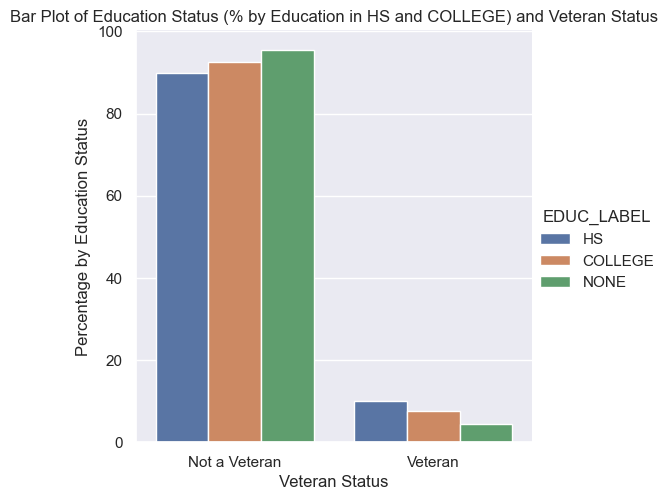

In [38]:
sns.catplot(data=educ_vet, kind='bar',x='VETSTAT',y ='norm_educ',hue='EDUC_LABEL',ci=None)

plt.title("Bar Plot of Education Status (% by Education in HS and COLLEGE) and Veteran Status")
plt.ylabel("Percentage by Education Status")
plt.xlabel("Veteran Status")
plt.xticks([0,1],["Not a Veteran", "Veteran"])
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)